## Project Title: Exploratory Data Analysis for a New Movie Studio Venture

### Business Problem

Our client is exploring an entry into the movie production industry but lacks insider knowledge about what drives box office success. Box office refers explicitly to theatre ticket sales. To make informed decisions, we need to identify the key characteristics of financially successful films.

### Project Goal

This analysis aims to explore historical box office data alongside movie attributes such as genre, ratings, and release trends to uncover patterns associated with higher revenue. Based on our findings, we will present three actionable business recommendations to guide the client’s movie production strategy.

### Objectives:  
We are looking to answer the following research questions:
1. Genre trends: Which genres are most profitable?
2. Runtime, Ratings, and Revenue: Is there a correlation between rating or length and revenue?
3. Release Seasons(q1,q2,q3,q4): Which months do movies do best? 
4. Do movies with different content ratings have significantly different average ROI?  

### Datasets Used

We use three main datasets:

- Box Office Mojo (bom.movie_gross.csv.gz): Contains domestic gross revenue, production studio, release year, and movie titles.

- IMDB Dataset (im.db SQLite file): Includes detailed movie metadata from movie_basics (title, genre, runtime) and movie_ratings (average rating, number of votes).

- TN Movie Budgets Dataset (tn.movie_budgets.csv): Contains data on movie budgets, domestic and worldwide gross, and release dates.

These datasets will be cleaned and merged to create a unified dataset for analysis.

### 1.1 Importing necessary libraries

In [28]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

### 1.2 Loading datasets

In [29]:
# Loading BOM dataset
bom_df = pd.read_csv('bom.movie_gross.csv')

# Loading IMBD dataset
conn = sqlite3.connect('im.db')

# Loading TN dataset
tn_df = pd.read_csv('tn.movie_budgets.csv')

### 1.3 Exploratory Data Analysis


In [30]:
# BOM dataset
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [31]:
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [32]:
#view all tables in IMDB database
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql(query, conn)
print(tables)

            name
0   movie_basics
1      directors
2      known_for
3     movie_akas
4  movie_ratings
5        persons
6     principals
7        writers


In [33]:
# IMDB Movie basics dataset
basics_df = pd.read_sql(""" 
    SELECT * FROM movie_basics
""", conn)
basics_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [34]:
#get data type of basics_df and non-null count
basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [35]:
# IMDB movie ratings dataset
ratings_df = pd.read_sql("""
    SELECT * FROM movie_ratings
""", conn)
ratings_df

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [36]:
#get data type of ratings_df and non-null count
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [37]:
# TN Movie budgets dataset
tn_df = pd.read_csv('tn.movie_budgets.csv')
tn_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [38]:
#get data type of tn columns and non-null count
tn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


## 2.1 Data Cleaning

### For the Box office csv dataset and IMDB basics_df table we are dropping the null values, to prepare the data for analysis.

In [39]:
#dropping null values in box office movie dataset
bom_df = bom_df.dropna()
bom_df
bom_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   object 
 4   year            2007 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 94.1+ KB


In [40]:
#dropping null values in basics table from IMDB Database
basics_df = basics_df.dropna()
basics_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112232 entries, 0 to 146139
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         112232 non-null  object 
 1   primary_title    112232 non-null  object 
 2   original_title   112232 non-null  object 
 3   start_year       112232 non-null  int64  
 4   runtime_minutes  112232 non-null  float64
 5   genres           112232 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.0+ MB


In [41]:
#show total of missing values from both tables
print(ratings_df.isnull().sum())
print(basics_df.isnull().sum())

movie_id         0
averagerating    0
numvotes         0
dtype: int64
movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64


## 2.2 Data Wrangling

### Create a unified movies_df table using inner join with basics_df and ratings_df for easier analysis.


In [42]:
#merging on 'movie_id' which is similar in both tables
movies_df = pd.merge(basics_df, ratings_df, on = "movie_id", how = "inner")
movies_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
4,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
...,...,...,...,...,...,...,...,...
65715,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365
65716,tt9913056,Swarm Season,Swarm Season,2019,86.0,Documentary,6.2,5
65717,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
65718,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136


In [43]:
#visualize new unified columns, their datatypes and non-null values
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65720 entries, 0 to 65719
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         65720 non-null  object 
 1   primary_title    65720 non-null  object 
 2   original_title   65720 non-null  object 
 3   start_year       65720 non-null  int64  
 4   runtime_minutes  65720 non-null  float64
 5   genres           65720 non-null  object 
 6   averagerating    65720 non-null  float64
 7   numvotes         65720 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


To accurately merge datasets from different sources (IMDb, Box Office Mojo, TN_Movie_Budgets), we need a common key — the movie title. However, title formatting often varies across datasets due to differences in capitalization, punctuation, and whitespace.

In this step, we:

* Convert all titles to lowercase

* Strip any leading or trailing whitespace

* This standardization allows for more accurate joins between datasets on title and release year.

In [44]:
#Standardize the titles
movies_df['original_title'] = movies_df['original_title'].str.lower().str.strip()
bom_df['title'] = bom_df['title'].str.lower().str.strip()
tn_df['movie'] = tn_df['movie'].str.lower().str.strip()


In [45]:
#Merge Box Office with IMDB (inner join on titles)
bom_imdb_df = pd.merge(
    bom_df, 
    movies_df, 
    left_on='title', 
    right_on='original_title', 
    how='inner'  # or 'left' if you want to keep all from BOM
)
bom_imdb_df


,title,studio,domestic_gross,foreign_gross,year,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,toy story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,toy story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218
1,inception,WB,292600000.0,535700000,2010,tt1375666,Inception,inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2,shrek forever after,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,shrek forever after,2010,93.0,"Adventure,Animation,Comedy",6.3,167532
3,the twilight saga: eclipse,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,the twilight saga: eclipse,2010,124.0,"Adventure,Drama,Fantasy",5.0,211733
4,iron man 2,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,iron man 2,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1560,bilal: a new breed of hero,VE,491000.0,1700000,2018,tt3576728,Bilal: A New Breed of Hero,bilal: a new breed of hero,2015,105.0,"Action,Adventure,Animation",8.0,16854
1561,i still see you,LGF,1400.0,1500000,2018,tt2160105,I Still See You,i still see you,2018,98.0,"Fantasy,Thriller",5.7,5010
1562,the catcher was a spy,IFC,725000.0,229000,2018,tt4602066,The Catcher Was a Spy,the catcher was a spy,2018,98.0,"Biography,Drama,War",6.2,4653
1563,time freak,Grindstone,10000.0,256000,2018,tt6769280,Time Freak,time freak,2018,104.0,"Comedy,Drama,Romance",5.7,3455


In [46]:
#Merge with TN movie budgets
full_df = pd.merge(
    bom_imdb_df, 
    tn_df, 
    left_on='title', 
    right_on='movie', 
    how='inner'  
)
full_df
full_df.info() #see the full_df columns


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1176 entries, 0 to 1175
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1176 non-null   object 
 1   studio             1176 non-null   object 
 2   domestic_gross_x   1176 non-null   float64
 3   foreign_gross      1176 non-null   object 
 4   year               1176 non-null   int64  
 5   movie_id           1176 non-null   object 
 6   primary_title      1176 non-null   object 
 7   original_title     1176 non-null   object 
 8   start_year         1176 non-null   int64  
 9   runtime_minutes    1176 non-null   float64
 10  genres             1176 non-null   object 
 11  averagerating      1176 non-null   float64
 12  numvotes           1176 non-null   int64  
 13  id                 1176 non-null   int64  
 14  release_date       1176 non-null   object 
 15  movie              1176 non-null   object 
 16  production_budget  1176 

### Selecting relevant columns for analysis
* Columns remained with include : **title, year, runtime_minutes, genres, average_rating, release_date, production_budget, domestic_gross and worldwide gross**
* Rationale - We establish that these columns are the most relevant in the solutions we aim to provide to the client.

In [47]:
full_df.drop(columns = ["studio", "id", "movie", "domestic_gross_x", "foreign_gross", "title", "movie_id", 
                        "primary_title", "original_title", "start_year", "numvotes", "movie"], inplace = True)


In [48]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1176 entries, 0 to 1175
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               1176 non-null   int64  
 1   runtime_minutes    1176 non-null   float64
 2   genres             1176 non-null   object 
 3   averagerating      1176 non-null   float64
 4   release_date       1176 non-null   object 
 5   production_budget  1176 non-null   object 
 6   domestic_gross_y   1176 non-null   object 
 7   worldwide_gross    1176 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 82.7+ KB


## 3. Data Analysis

Having cleaned the data, we can begin to analyze it to generate insights
## Research Questions:
3.1. Do movies with different genres have significantly different average ROI?  
3.2. Release Seasons(q1,q2,q3,q4): Which months do movies do best?  
3.3. Genre trends: Which genres are most profitable?    
3.4. Runtime, Ratings, and Revenue: Is there a correlation between rating or length and revenue?   
  



### 3.1 Do movies with different genres have significantly different average ROI?

In [49]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1176 entries, 0 to 1175
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               1176 non-null   int64  
 1   runtime_minutes    1176 non-null   float64
 2   genres             1176 non-null   object 
 3   averagerating      1176 non-null   float64
 4   release_date       1176 non-null   object 
 5   production_budget  1176 non-null   object 
 6   domestic_gross_y   1176 non-null   object 
 7   worldwide_gross    1176 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 82.7+ KB


In [50]:
# define a function to convert the object-type columns to integers
def clean_money(value):
    return int(value.replace("$", "").replace(",", ""))

In [51]:
# cleaning currency columns
full_df["worldwide_gross"] = full_df["worldwide_gross"].apply(clean_money)
full_df["production_budget"] = full_df["production_budget"].apply(clean_money)

full_df.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1176 entries, 0 to 1175
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               1176 non-null   int64  
 1   runtime_minutes    1176 non-null   float64
 2   genres             1176 non-null   object 
 3   averagerating      1176 non-null   float64
 4   release_date       1176 non-null   object 
 5   production_budget  1176 non-null   int64  
 6   domestic_gross_y   1176 non-null   object 
 7   worldwide_gross    1176 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 82.7+ KB


In [52]:
# calcute ROI
full_df['ROI'] = (full_df['worldwide_gross'] - full_df['production_budget']) / full_df['production_budget']


full_df = full_df[(full_df['production_budget'] > 0) & (full_df['worldwide_gross'] > 0)]

full_df.head()

,year,runtime_minutes,genres,averagerating,release_date,production_budget,domestic_gross_y,worldwide_gross,ROI
0,2010,103.0,"Adventure,Animation,Comedy",8.3,"Jun 18, 2010",200000000,"$415,004,880",1068879522,4.344398
1,2010,148.0,"Action,Adventure,Sci-Fi",8.8,"Jul 16, 2010",160000000,"$292,576,195",835524642,4.222029
2,2010,93.0,"Adventure,Animation,Comedy",6.3,"May 21, 2010",165000000,"$238,736,787",756244673,3.583301
3,2010,124.0,"Adventure,Drama,Fantasy",5.0,"Jun 30, 2010",68000000,"$300,531,751",706102828,9.383865
4,2010,124.0,"Action,Adventure,Sci-Fi",7.0,"May 7, 2010",170000000,"$312,433,331",621156389,2.653861


ANOVA F-statistic: 8.08
P-value: 0.00000


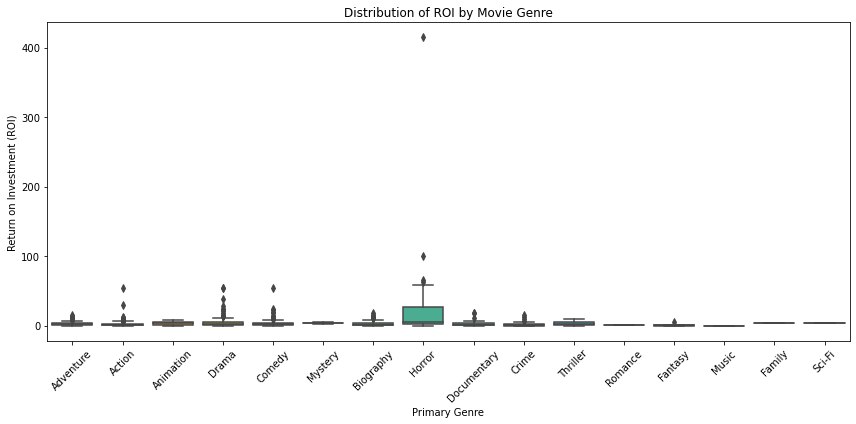

In [53]:
from scipy.stats import f_oneway

full_df['primary_genre'] = full_df['genres'].apply(lambda x: x.split(',')[0] if pd.notnull(x) else 'Unknown')

# ANOVA test
roi_by_genre = full_df.groupby('primary_genre')['ROI']
roi_lists = [group.dropna().values for name, group in roi_by_genre]
f_stat, p_value = f_oneway(*roi_lists)

# Print test result
print(f"ANOVA F-statistic: {f_stat:.2f}")
print(f"P-value: {p_value:.5f}")

# Visualization
plt.figure(figsize=(12, 6))
sns.boxplot(x='primary_genre', y='ROI', data=full_df)
plt.xticks(rotation=45)
plt.title('Distribution of ROI by Movie Genre')
plt.ylabel('Return on Investment (ROI)')
plt.xlabel('Primary Genre')
plt.tight_layout()
plt.show()

Statistical Conclusion
- ANOVA F-statistic:  8.08

- P-value < 0.00001

This means:
**There is a statistical signicant difference in ROI between at least some movie genres.**

Insights from the Boxplot:
- One genre (likely Comedy or Horror based on typical trends) has a much wider ROI range and higher median, with many outliers (potential hits with massive ROI).

- Several genres are clustered with low ROI, suggesting low profitability or high risk.


### 3.2 Which months do movies do best?

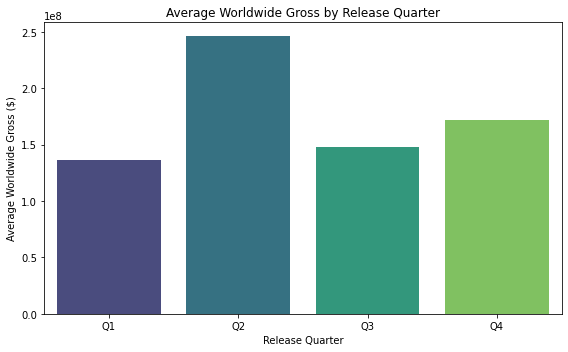

In [54]:
# Clean worldwide gross
def parse_currency(x):
    return float(str(x).replace('$', '').replace(',', '').strip()) if pd.notnull(x) else None

full_df['worldwide_gross'] = full_df['worldwide_gross'].apply(parse_currency)

# Parse release month from release_date
full_df['release_date'] = pd.to_datetime(full_df['release_date'], errors='coerce')
full_df['release_month'] = full_df['release_date'].dt.month

# Map months to quarters
def month_to_quarter(month):
    if month in [1, 2, 3]: return 'Q1'
    elif month in [4, 5, 6]: return 'Q2'
    elif month in [7, 8, 9]: return 'Q3'
    elif month in [10, 11, 12]: return 'Q4'
    else: return 'Unknown'

full_df['release_quarter'] = full_df['release_month'].apply(month_to_quarter)

# Drop missing values
full_df = full_df.dropna(subset=['worldwide_gross', 'release_quarter'])

# Group by quarter and calculate mean revenue
revenue_by_quarter = full_df.groupby('release_quarter')['worldwide_gross'].mean().reindex(['Q1', 'Q2', 'Q3', 'Q4'])

# Plot results
plt.figure(figsize=(8, 5))
sns.barplot(x=revenue_by_quarter.index, y=revenue_by_quarter.values, palette='viridis')
plt.title('Average Worldwide Gross by Release Quarter')
plt.ylabel('Average Worldwide Gross ($)')
plt.xlabel('Release Quarter')
plt.tight_layout()
plt.show()